<a href="https://colab.research.google.com/github/hodurang2/CV_project/blob/main/week4_%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B_%ED%81%B4%EB%9E%98%EC%8A%A4_%EC%BB%A4%EC%8A%A4%ED%85%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Study

## 모듈 import

In [ ]:
import torch
import matplotlib.pyplot as plt
import matplotlib
from torch.utils.data import Dataset,DataLoader # 커스터마이징
import torchvision
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import glob
import os
import albumentations
import albumentations.pytorch
from albumentations.pytorch.transforms import ToTensorV2

## 경로설정

In [ ]:
pwd

'/content'

In [ ]:
%cd /content/drive/MyDrive/CV_seminar_project/

/content/drive/MyDrive/CV_seminar_project


In [ ]:
root_path = '/content/drive/MyDrive/CV_seminar_project/'
train_path = '/content/drive/MyDrive/CV_seminar_project/train'
test_path = '/content/drive/MyDrive/CV_seminar_project/test'

dolphin_dir = '/dolphin'
shark_dir = '/shark'
whale_dir = '/whale'

## pytorch 데이터셋 클래스 실습

### 파이토치 데이터셋 클래스 직접 만들기
1. __init__ 생성자가 필요함
2. __getitem__ 필요 -> 데이터를 읽는 역할(인덱스 부여, iterable)
3. __len__ 필요 -> 데이터 개수를 알려주는 역할.

In [ ]:
import torch
import matplotlib.pyplot as plt
import matplotlib
from torch.utils.data import Dataset,DataLoader # 커스터마이징
import torchvision
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import glob
import os
import albumentations
import albumentations.pytorch
from albumentations.pytorch.transforms import ToTensorV2

class Custom_dataset(Dataset): # mode -> 데이터 셋 종류
  def __init__(self, root_path, mode, transform = None): # 생성자 특수메소드
    self.all_data = sorted(glob.glob(os.path.join(root_path, mode, '*', '*'))) # 모든 데이터 경로
    self.transform = transform # augmentation
  
  def __getitem__(self, index):
    
    if torch.is_tensor(index):
      index = index.tolist()

    # 이미지 읽기
    data_path = self.all_data[index]
    image = cv2.imread(data_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # 채널 축 : BGR -> RGB로 변환

    #  transform (Augmentation)
    if self.transform is not None:
      augmentation = self.transform( image = image )
      image = augmentation['image']

    # label 만들어주기.
    label = []
    if 'dolphin' in data_path.split('/')[-1] == True:
      label = 0
    elif 'shark' in data_path.split('/')[-1] == True:
      label = 1
    else:
      label = 2

    return image, label

  def __len__(self):
    length = len(self.all_data) # 전체 데이터 개수
    return length

In [ ]:
pytorch_dataset = Custom_dataset(root_path = root_path, mode = 'train')

from PIL import Image as PILImage

train_loader = torch.utils.data.DataLoader(pytorch_dataset, batch_size = 1,
                                           shuffle = None, num_workers = 0)

for data, label in train_loader :
  break

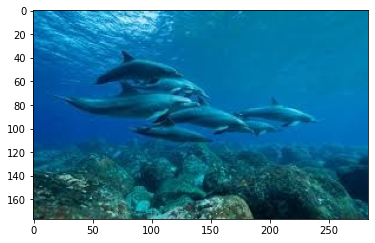

In [ ]:
plt.imshow(pytorch_dataset[0][0])

위에서 이미지가 잘 나왔으면 통과!

2. 더 강력한 augmentation 툴 albumentation 이용하기.

In [ ]:
import albumentations
import albumentations.pytorch

albumentations = albumentations.Compose( [ 
    albumentations.Resize(224,224),
    #albumentations.pytorch.transforms.ToTensorV2()
    albumentations.OneOf([
        albumentations.HorizontalFlip(p = 0.8),
        albumentations.VerticalFlip(p = 0.8),
        albumentations.RandomRotate90(p = 0.8),
    ], p = 1),
    albumentations.OneOf([
        albumentations.MotionBlur(p = 0.8), # 흐리게
        albumentations.OpticalDistortion(p = 0.8), # 왜곡
        albumentations.GaussNoise(p = 0.8), # 노이즈 추가
    ], p = 1)    
]
)
pytorch_dataset = Custom_dataset(root_path = root_path, mode = 'train', transform = albumentations)

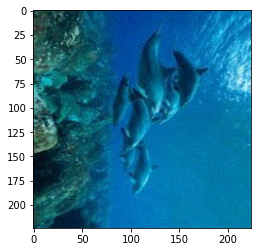

In [ ]:
plt.imshow(pytorch_dataset[0][0])

# homework

정상 data_set

In [ ]:
pytorch_dataset = Custom_dataset(root_path = root_path, mode = 'train')

augmentation data set

In [ ]:
import albumentations
import albumentations.pytorch
from albumentations.pytorch.transforms import ToTensorV2

albumentations = albumentations.Compose( [ 
    albumentations.Resize(224,224), # 원래 input size를 (224,224)크기로 변경 
    albumentations.OneOf([
        albumentations.HorizontalFlip(p = 0.8),
        albumentations.VerticalFlip(p = 0.8),
        albumentations.RandomRotate90(p = 0.8),
    ], p = 1),
    albumentations.OneOf([
        albumentations.MotionBlur(p = 0.8), # 흐리게
        albumentations.OpticalDistortion(p = 0.8), # 왜곡
        albumentations.GaussNoise(p = 0.8), # 노이즈 추가
    ], p = 1),
    #albumentations.pytorch.transforms.ToTensorV2()    
]
)
album_dataset = Custom_dataset(root_path = root_path, mode = 'train', transform = albumentations)

In [ ]:

album_dataset[0]

(tensor([[[  0,   7,   1,  ...,   6,   2,  14],
          [  2,   4,   1,  ...,   0,   1,  29],
          [  0,   0,   0,  ...,   0,  23,  23],
          ...,
          [  1,   1,  16,  ...,  49,  40,  18],
          [ 11,  17,  18,  ...,  32,  29,  23],
          [  0,  27,  35,  ...,   6,  17,  43]],
 
         [[122, 133, 115,  ..., 134, 125, 140],
          [118, 132, 121,  ..., 126, 121, 151],
          [126, 126, 126,  ..., 130, 134, 153],
          ...,
          [ 64,  50,  56,  ...,  89,  75,  73],
          [ 66,  66,  63,  ...,  67,  71,  58],
          [ 70,  79,  82,  ...,  45,  52,  79]],
 
         [[170, 162, 171,  ..., 183, 187, 210],
          [162, 162, 173,  ..., 180, 191, 206],
          [165, 168, 159,  ..., 190, 194, 213],
          ...,
          [ 76,  76,  87,  ...,  84,  80,  72],
          [ 87,  81,  75,  ...,  68,  69,  68],
          [ 69,  94,  97,  ...,  49,  51,  82]]], dtype=torch.uint8), 2)

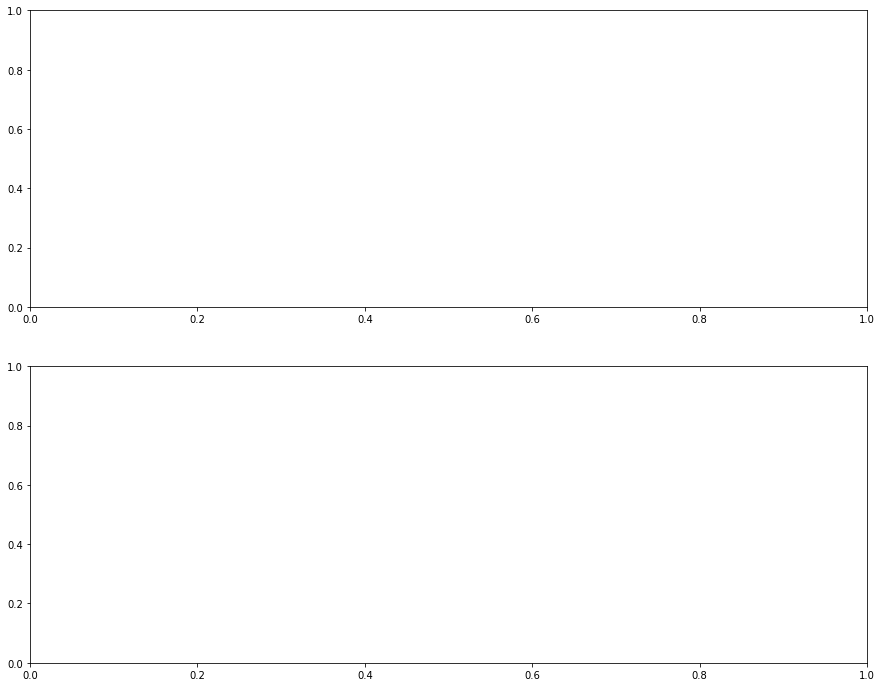

In [ ]:
fig = plt.figure(figsize = (15,12))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
